# Lab 5: Vector space models for semantics

In this lab, you will learn how to build and use vector space models of word meanings. You will need to be able to install new python libraries on your own computer.

**Add, commit, and push this Jupyter Notebook to your GitHub repo by Wednesday, October 19, at 11:59pm EDT.**


## Installing gensim

**If you have installed gensim previously**, it might be a good idea to upgrade it with pip3.

``python3 -m pip install --upgrade gensim``

**If you don't already have gensim installed**, you will need to install it. As I've said before, this is something that a CS major or minor at your level should be able to do without assistance. I hope by the end of this class, you will all have figured this out! Here's what I would recommend:

1. Launch Anacona Navigator. Go to the little package explorer thing on the left, and use the GUI to install gensim. Then launch jupyter from within Anaconda Navigator.

2. Launch a terminal. Type this

``python3 -m pip install jupyter``

``python3 -m pip install gensim``

``jupyter notebook``

If neither of those works, come to my office hours (TWTh 8:30-9:30am on Zoom, link on Canvas.)

## 1. Importing some libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gensim
import re
import nltk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models import Word2Vec



## 2. Preparing the data 

We first need to prepare some data to put it in the format that gensim is expecting. We're going to be building a model using some 19th century literature, which I've compiled into a single text file called <code>all19thcent.txt.</code>

Open the file, and read the text into a single string, removing the final end of line character (<code>\n</code>).

Then sentence-tokenize the text into a list of sentences using <code>nltk.sent_tokenize</code>.

Then word tokenize each sentence into a list of tokens using <code>nltk.word_tokenize</code> 

*(Hint: You have already done this before in a lab, so go back and look at earlier labs if you're having trouble. Please try to do this yourself without asking for help.)*

At the end, you should have a list of lists. The print statement at the end of the next cell should yield the following output. If it doesn't you did something wrong. 

<code>['``', 'She', 'knows', 'better', '.', "''"]</code>


In [2]:
alltext = ""   # where to store the full text of the text file
toksents = []  # where to store the list of lists (i.e., sentences of word tokens)

# open the all19thcent.txt files and read the whole file into one string.

# replace all "\n" in the file with a space (i.e, " ")

# break the file into a list of sentences with nltk.sent_tokenize

# break each sentence into a list of tokens with nltk.word_tokenize
# store that list of lists in toksents


# Uncomment the following to confirm your output is correct.
# print(toksents[1005])
  


['``', 'She', 'knows', 'better', '.', "''"]


**The code block above will take a while to complete. If you're not sure whether the code is running, check in the brackets to the left of the cell. If you see <code>*</code>, that means the command is still executing, so just wait until you see a number in those brackets.**

## 3. Building a word2vec model

Now you are ready to build your very first word2vec model. Run the command below, and <b>do not proceed with anything until you see the message</b> <code>"model built!"</code>. If you're not sure what's happening, check in the brackets to the left of the cell. If you see <code>*</code>, that means the command is still executing, so just wait until you see a number in those brackets.

In [3]:
model = Word2Vec(toksents, vector_size=100, window=5, min_count=3, workers=4)
print("model built!")

model built!


### Q1: What do you think the <code>vector_size, window</code> and <code>min_count</code> parameters in the call to Word2Vec means? Explain each one. Feel to refer to the documentation for gensim.

**Your answer to Q1 goes here**


Congratulations! You have built your first word2vec model! Now you can start querying the words in that model. The individual values in the vectors won't mean anything to a human, but you can print them out like this:

In [4]:
model.wv['first']

array([ 2.1816373e+00,  1.5324526e+00,  1.0292571e+00,  2.9880348e-01,
       -1.4363272e+00,  4.4445646e-01, -7.7316439e-01,  3.8230139e-01,
       -5.9580183e-01, -1.6443588e+00,  7.6936525e-01, -2.2012980e+00,
       -1.1080650e+00, -9.5856357e-01, -1.8824133e+00,  6.5128535e-01,
       -6.9587553e-01,  1.8611709e+00,  1.2279252e+00,  5.6285405e-01,
       -6.1418629e-01, -7.4621898e-01, -1.2245601e+00, -6.6432589e-01,
       -3.7703562e-01, -1.0433106e+00, -8.0180779e-02,  5.9762532e-01,
        7.5880730e-01, -1.2911198e+00,  2.4014103e+00,  5.6375653e-01,
       -7.5655907e-01, -4.0971573e-02,  1.2643528e+00,  8.4280342e-01,
        1.8268418e+00, -6.3384855e-01, -1.9812253e+00, -1.7964540e+00,
       -4.6341324e-01, -1.7897420e+00, -4.8481766e-02, -2.9491171e-01,
        4.3474454e-01,  1.1433384e+00, -4.2426236e-02,  2.3361538e-01,
       -3.0972153e-01, -1.2882227e+00,  2.1312383e-04, -1.4199573e+00,
       -2.4165286e-01, -1.1552240e+00, -1.8452890e+00, -3.9174184e-01,
      

## 4. Using word2vec word embeddings

The cool part is using the vectors to learn about how words are related to one another. In class we learned that you can use cosine similarity to do this. Below, we use the built-in function <code>similarity</code> to calculate the cosine similarity between two word vectors. Try running the code in the three cells below:

In [5]:
model.wv.similarity('girl', 'woman')

0.8787101

In [6]:
model.wv.similarity('roof', 'whether')

0.0023699796

In [7]:
model.wv.similarity("chair", "carpet")

0.48770458

### Q2: What values did you get? What do the values mean and why? Why did you need to look at more than one similarity value to be able to interpret the results?

**Your answer to Q2 goes here**


The cells below show you the different things you can do with gensim on a word2vec word embedding model. 

Try each one out, and experiment with using different words than the ones I've provided below. Remember that this is literature from the 19th century! Probe the model to try to find out interesting thigns about how language might have been different in the 1800s.

Then experiment with very common words and rarer words to see whether the model has captured helpful similarity information.

(Note also: if the word doesn't appear in the model, you'll get an ugly error message.)

In [8]:
model.wv.doesnt_match(["man", "woman", "child", "tree"])

'tree'

In [9]:
model.wv.most_similar(positive=['woman', 'boy'], negative=['man'])

[('girl', 0.8573396801948547),
 ('child', 0.7960748672485352),
 ('baby', 0.7815583348274231),
 ('lad', 0.7361873388290405),
 ('creature', 0.7177210450172424),
 ('maid', 0.6958818435668945),
 ('fellow', 0.6885150671005249),
 ('widow', 0.6631909608840942),
 ('servant', 0.6553676128387451),
 ('creetur', 0.6421812176704407)]

In [10]:
model.wv.most_similar("cool")

[('hot', 0.6575304865837097),
 ('warm', 0.6392249464988708),
 ('neat', 0.6111586689949036),
 ('cheerful', 0.601475179195404),
 ('big', 0.6004123687744141),
 ('comfortable', 0.600188136100769),
 ('fresh', 0.594236433506012),
 ('dull', 0.5917349457740784),
 ('clear', 0.581011176109314),
 ('clean', 0.580938458442688)]

### Q3: Name one of two interesting observations about 1800s language you were able to make in your experimentation. Are the results what you expected?

<b>Enter your answer to Q3 here</b>

### Q4: This model was built on a very small corpus (3.5 million words). How well does this model capture word similarities? What are some strengths and weaknesses you observed?

<b>Enter your answer to Q4 here</b>


## 5. Comparing two different models 

Now let's build a model on a more contemporary corpus! This corpus is a mix of movie scripts and the free-use portion of the Corpus of Contemporary English (COCA), a balanced corpus containing literature, plays, news articles, books, magazines, and other written texts from 1960 to the present.

Follow the same procedure as you did before to read in and tokenize the file, which is called <code>allcontempo.txt.</code>

When you uncomment the last line in the cell below, you should get the following output.

<code>['His', 'clothes', 'reflect', 'his', 'high', 'station', 'at', 'Ames', ':', 'a', 'gray', 'felt', 'bowler', 'hat', ',', 'and', 'an', 'expensive', ',', 'tailored', 'overcoat', ',', 'with', 'a', 'carnation', 'in', 'its', 'lapel', 'and', 'two', 'silk', 'handkerchiefs', 'peeking', 'up', 'from', 'its', 'breast', 'pocket', '.']</code>

In [1]:
alltextcontempo = ""   # where to store the full text of the text file
toksentscontempo = []  # where to store the list of lists (i.e., sentences of word tokens)

# FYI, I recommend using these arguments when opening the file since
# they will handle weird encoding errors.
# f = open("allcontempo.txt", errors="replace", encoding="utf-8")

# read in the whole file into a string


# replace all "\n" in the file with a space (i.e, " ")


# break the file into a list of sentences with nltk.sent_tokenize


# break each sentence into a list of tokens with nltk.word_tokenize
# store that list of lists in toksents


# Uncomment the following to confirm your output is correct.
# print(toksentscontempo[1000])



Now build a word2vec model as you did with the 19th century literature by running the cell below. We're saving the model to a different variable name, <code>contempomodel</code>, so that we can compare this model with the 19th century literature model.

Don't forget: when you run the command to build the word2vec model, <b>do not proceed with anything until you see the message</b> <code>"model built!"</code>. If you're not sure what's happening, check in the brackets to the left of the cell. If you see <code>*</code>, that means the command is still executing, so just wait until you see a number in those brackets.

In [12]:
modelcontempo = Word2Vec(toksentscontempo, vector_size=100, window=5, min_count=3, workers=4)
print("model built!")

model built!


Let's see how these two models are different and how they are the same. Experiment with setting the <code>checkme</code> variable to several different words and executing the two cells below. Try to think of words you think probably haven't changed much since the 19th century and words you think might have changed since then. 

In [13]:
checkme = "cool"
model.wv.most_similar(checkme)

[('hot', 0.6575304865837097),
 ('warm', 0.6392249464988708),
 ('neat', 0.6111586689949036),
 ('cheerful', 0.601475179195404),
 ('big', 0.6004123687744141),
 ('comfortable', 0.600188136100769),
 ('fresh', 0.594236433506012),
 ('dull', 0.5917349457740784),
 ('clear', 0.581011176109314),
 ('clean', 0.580938458442688)]

In [14]:
modelcontempo.wv.most_similar(checkme)

[('warm', 0.7857797145843506),
 ('tight', 0.7581393122673035),
 ('shaking', 0.7410629987716675),
 ('sweet', 0.7395565509796143),
 ('soft', 0.736686110496521),
 ('wet', 0.7306132912635803),
 ('cold', 0.7267618775367737),
 ('breathing', 0.7103124856948853),
 ('naked', 0.707240641117096),
 ('slowly', 0.7004542350769043)]

### Q5: What words did you try? What did the models tell you about these words? Which were about the same in the two models and which were different? Answer thoughtfully.

<b>Enter your answer to Q5 here</b>


## 6. Comparing a small model with a big model

The models we built above were kind of weak because they were built on such small corpora (about 3.5 million words each). Fortunately, I have provided you with a huge pre-built model, built on 300 billion words of Google news. You can load it by executing the code in the cell below.

<b>Note: It will take a minute or two to load!</b> Wait until you see <code>"big model loaded"</code> printed out below the cell. You can also check for the <code>*</code> in the brackets to the left of the cell you are executing.

In [15]:
bigmodel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)
print("big model loaded!")

big model loaded!


Because this model was built in a slightly different way, you can run all of the above commands without using the <code>.wv</code> after the model name, like so:

In [16]:
bigmodel.most_similar(checkme)

[('Cool', 0.5849888324737549),
 ('cooler', 0.5534803867340088),
 ('coolest', 0.5431790351867676),
 ('coolness', 0.5307181477546692),
 ('toasty', 0.527403712272644),
 ('warm', 0.5268722772598267),
 ('hot', 0.5151149034500122),
 ('cooled', 0.5131838321685791),
 ('cools', 0.511819064617157),
 ('supercool', 0.5060998201370239)]

### Q6: Experiment with this model using the other commands you learned about above. (Again, don't forget to leave out the <code>wv</code> when probing the big pre-trained model.) How does this model compare to the smaller models you built? For instance: do you think the information it is providing is better or more accurate? how is it different? why do you think this might be?

<b>Enter your answer to Q6 here</b>
<font color="red">

## 6. Visualizing word vectors

In class, I showed you some plots of word vectors, where the 300 dimensions had been projected down to 2 dimensions. Here we will use the PCA dimensionality reduction method I mentioned in class. The code in the cell below will take word pairs, in which the first word is related in some way to the second word, and plot them in two dimensions. Execute this cell, and you should see a nice graph underneath.

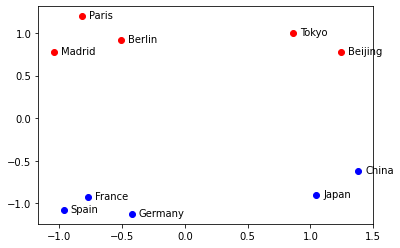

In [17]:
wordpairs = {"Madrid":"Spain", "Paris":"France",  "Berlin":"Germany", "Beijing":"China", "Tokyo":"Japan"}

# Go get the word vectors for these words and 
# then store them so you can use them later on.
vecwords = []  # stores the words above
vecs = []      # stores the vectors for each word
for k,v in wordpairs.items():
    kvec = bigmodel[k]
    vvec = bigmodel[v]
    vecs.append(kvec)
    vecwords.append(k)
    vecs.append(vvec)
    vecwords.append(v)
    
# PCA is a way to project multiple dimensions down to 
# fewer dimensions, which we are doing here so we can 
# visualize the word vectors.
pca = PCA(n_components=2, whiten=True)
vectors2d = pca.fit(vecs).transform(vecs)


# This is just some ugly matplotlib code for plotting
# the 2-D vectors and visualizing them with different colors.
i = 2
for point, word in zip(vectors2d, vecwords):
    if i%2 == 0:
        plt.scatter(point[0], point[1], c='r')
    else:
        plt.scatter(point[0], point[1], c='b')
    i += 1
    
    plt.annotate(
            word, 
            xy=(point[0], point[1]),
            xytext=(7, 6),
            textcoords='offset points',
            ha='left' ,
            va='top',
            size="medium"
            )


### Q7: In the code above, replace the word pairs with three other word pairs that share a relationship. Don't use world capitals. Try something else, like morphological variations (big ~ bigger) or common semantic relationship (a table is a piece of furniture). I'll run your code to see the graph. Briefly discuss below what the graph demonstrates (or fails to demonstrate).

<b>Enter your answer to Q7 here</b>


The cell below does something similar: it takes two lists of words and plots one in blue and one in red. If the words in one list are very related to one another and the words in the other list are very related to one another, you should see the red and blue dots clustering in different parts of the space.

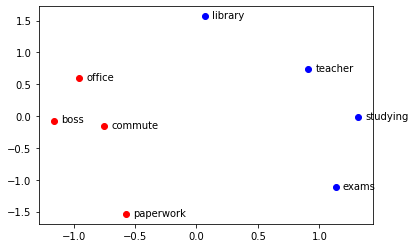

In [18]:
# Some words associated with 2 different categories: work and school

vecwords1 = "commute boss office paperwork".split()  
vecwords2 = "teacher studying library exams".split()
vecs = []
vecwords = []

# Get their vectors
for w in vecwords1:
    v = bigmodel[w]
    vecs.append(v)
    vecwords.append(w)

for w in vecwords2:
    v = bigmodel[w]
    vecs.append(v)
    vecwords.append(w)

    
#tsne = TSNE(n_components=2, random_state=0)
#vectors2d = tsne.fit_transform(vecs)

# Do the PCA to reduce to 2 dimensions
pca = PCA(n_components=2, whiten=True)
vectors2d = pca.fit(vecs).transform(vecs)

# Again, ugly matplotlib code to create visualization
i = 0
for point, word in zip(vectors2d, vecwords):
    if i < len(vecwords1):
        plt.scatter(point[0], point[1], c='r')
    else:
        plt.scatter(point[0], point[1], c='b')
    i += 1
    
    plt.annotate(
            word, 
            xy=(point[0], point[1]),
            xytext=(7, 6),
            textcoords='offset points',
            ha='left' ,
            va='top',
            size="medium"
            )

### Q8: In the code above, replace the word lists with other groups of words you think are related.  I'll run your code to see the graph. Briefly discuss below what the graph demonstrates (or fails to demonstrate).

<b>Enter your answer to Q8 here</b>


## 7. Verifying and submitting your work

You will be submitting this Jupyter Notebook to Canvas. 

Make sure you've answered every <b>Q</b> question.

Make sure you've written code wherever required. 

Go up to the Kernel menu and select Restart and Run All. This will run all of the code you've written. Make sure there are no errors.

Add, commit, and push this Jupyter notebook to your repo on GitHub by the deadline, October 19, 11:59pm EDT.